# Marimekko Plot

##### Fuente abierta de datos: https://www.kaggle.com/datasets/keremkarayaz/world-economic-indicators

##### Daniel Lázaro Lázaro

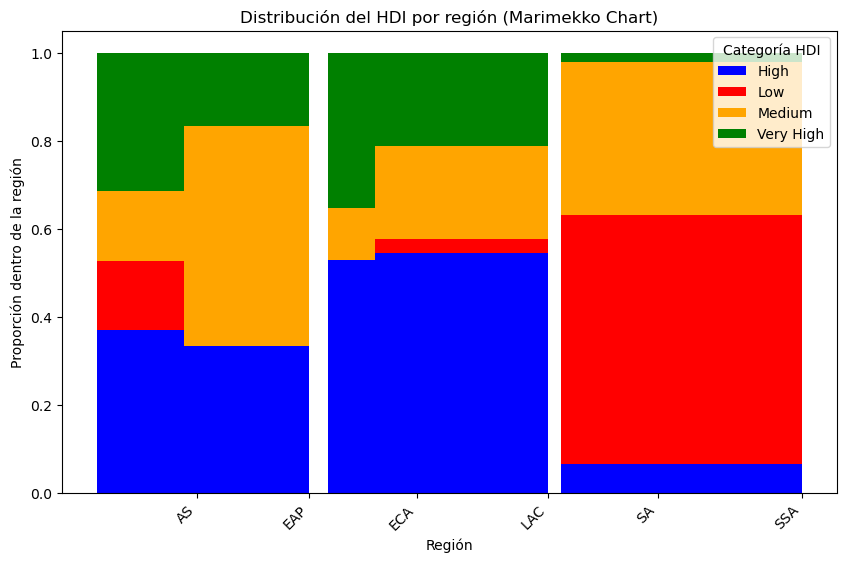

C:\Users\PC\anaconda3\Lib\site-packages\plotly\matplotlylib\mpltools.py:459: UserWarning:

'linear' x-axis tick spacing not even, ignoring mpl tick formatting.

C:\Users\PC\anaconda3\Lib\site-packages\plotly\matplotlylib\renderer.py:609: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.

C:\Users\PC\anaconda3\Lib\site-packages\plotly\matplotlylib\renderer.py:307: UserWarning:

found box chart data with length <= 1, assuming data redundancy, not plotting.



<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.io as pio
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\PC\Desktop\Máster CienciaDatos\2o Cuatrimestre\M2. 859 Visualización de Datos\PEC2\Data para Marimekko Flourish\HDI.csv",sep=',')
df.head(3)

df_filtered = df[['region', 'hdicode', 'country']].dropna()

df_grouped = df_filtered.groupby(['region', 'hdicode']).count().reset_index()
df_grouped.rename(columns={'country': 'count'}, inplace=True)

region_totals = df_grouped.groupby('region')['count'].sum()

df_grouped['region_width'] = df_grouped['region'].map(region_totals) / region_totals.sum()

df_grouped['height'] = df_grouped.groupby('region')['count'].transform(lambda x: x / x.sum())

fig, ax = plt.subplots(figsize=(10, 6))
x_offset = 0

color_map = {'Low': 'red', 'Medium': 'orange', 'High': 'blue', 'Very High': 'green'}

for region in df_grouped['region'].unique():
    region_data = df_grouped[df_grouped['region'] == region]
    y_offset = 0
    width = region_data['region_width'].iloc[0]

    for _, row in region_data.iterrows():
        ax.bar(x_offset, row['height'], width=width, bottom=y_offset, color=color_map[row['hdicode']], label=row['hdicode'] if x_offset == 0 else "")
        y_offset += row['height']

    x_offset += width

ax.set_xticks(np.cumsum(df_grouped['region_width'].unique()) - df_grouped['region_width'].unique() / 2)
ax.set_xticklabels(df_grouped['region'].unique(), rotation=45, ha='right')
ax.set_ylabel("Proporción dentro de la región")
ax.set_xlabel("Región")
ax.set_title("Distribución del HDI por región (Marimekko Chart)")
ax.legend(title="Categoría HDI")

plt.show()

plotly_fig = tls.mpl_to_plotly(fig)

pio.write_html(plotly_fig, "grafica_marimekkochart.html")

plt.savefig("grafica_marimekkochart.png", dpi=300)